<a href="https://colab.research.google.com/github/sukanyapanigrahi09/My-Python-Journey/blob/main/e_commerce_Furniture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
file_path = '/content/ecommerce_furniture_dataset_2024.csv'
df = pd.read_csv(file_path, encoding='UTF-8-SIG')

In [ ]:
# Inspect the first few rows and columns
print(df.head())
print(df.columns)

                                        productTitle originalPrice    price  \
0  Dresser For Bedroom With 9 Fabric Drawers Ward...           NaN   $46.79   
1  Outdoor Conversation Set 4 Pieces Patio Furnit...           NaN  $169.72   
2  Desser For Bedroom With 7 Fabric Drawers Organ...         $78.4   $39.46   
3  Modern Accent Boucle Chair,Upholstered Tufted ...           NaN  $111.99   
4  Small Unit Simple Computer Desk Household Wood...        $48.82   $21.37   

   sold        tagText  
0   600  Free shipping  
1     0  Free shipping  
2     7  Free shipping  
3     0  Free shipping  
4     1  Free shipping  
Index(['productTitle', 'originalPrice', 'price', 'sold', 'tagText'], dtype='object')


In [ ]:
# Basic info about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   productTitle   2000 non-null   object
 1   originalPrice  487 non-null    object
 2   price          2000 non-null   object
 3   sold           2000 non-null   int64 
 4   tagText        1997 non-null   object
dtypes: int64(1), object(4)
memory usage: 78.3+ KB
None


In [ ]:
# Check for missing values
print(df.isnull().sum())

productTitle        0
originalPrice    1513
price               0
sold                0
tagText             3
dtype: int64


In [ ]:
# Summary statistics
print(df.describe(include='all'))

                                             productTitle originalPrice  \
count                                                2000           487   
unique                                               1793           453   
top     3 Pieces Rocking Wicker Bistro Set, Patio Outd...        $46.45   
freq                                                    6             4   
mean                                                  NaN           NaN   
std                                                   NaN           NaN   
min                                                   NaN           NaN   
25%                                                   NaN           NaN   
50%                                                   NaN           NaN   
75%                                                   NaN           NaN   
max                                                   NaN           NaN   

        price          sold        tagText  
count    2000   2000.000000           1997  
unique   

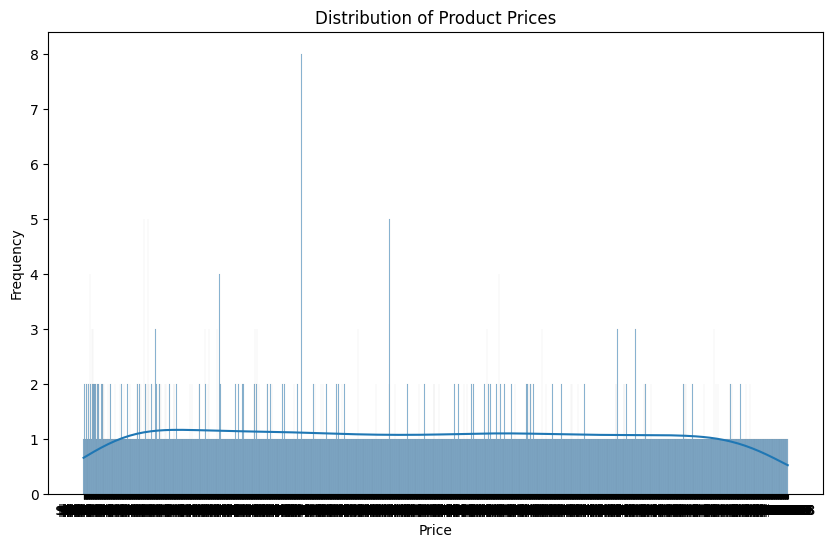

In [ ]:
# 1. Distribution of product prices
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# 2. Count of products by category (assuming productTitle contains category info)
# Extract category from productTitle if possible
# For now, just check the most common product titles
print(df['productTitle'].value_counts().head(10))

productTitle
3 Pieces Rocking Wicker Bistro Set, Patio Outdoor Furniture Conversation Sets with Porch Chairs and Glass Coffee Table, Beige       6
Makeup Vanity Table Set Glass Top Makeup Vanity Table With 10x Magnifying Mirror 3 Light Settings (Modern White) Furnitures Desk    5
Makeup Table Makeup Vanity With Lights Make Up Table 2 Cabinets & Long Storage Shelf Furniture Bathroom 10 Led Lights White Desk    5
White Vanity Desk with Mirror, Lights and Charging Station - Large Makeup Table Set with RGB Cabinets and 3 LED Light Modes         4
Vanity Desk With Stool Makeup Vanity Table Set 3 Color Lighting Modes Brightness Adjustable Dressers for Bedroom Furniture Girls    4
Makeup Vanity Organizer Makeup Vanity Desk With Mirror and Lights Dressers for Bedroom Furniture 5 Drawers & Storage Bag Dresser    4
LIKIMIO Small Makeup Vanity Desk with Mirror and Lights, Vanity Table Set with Storage Drawer & Chair & 3 Shelves, Bedroom          4
Dressing Table for Bedroom Furniture Home 4 Cabin

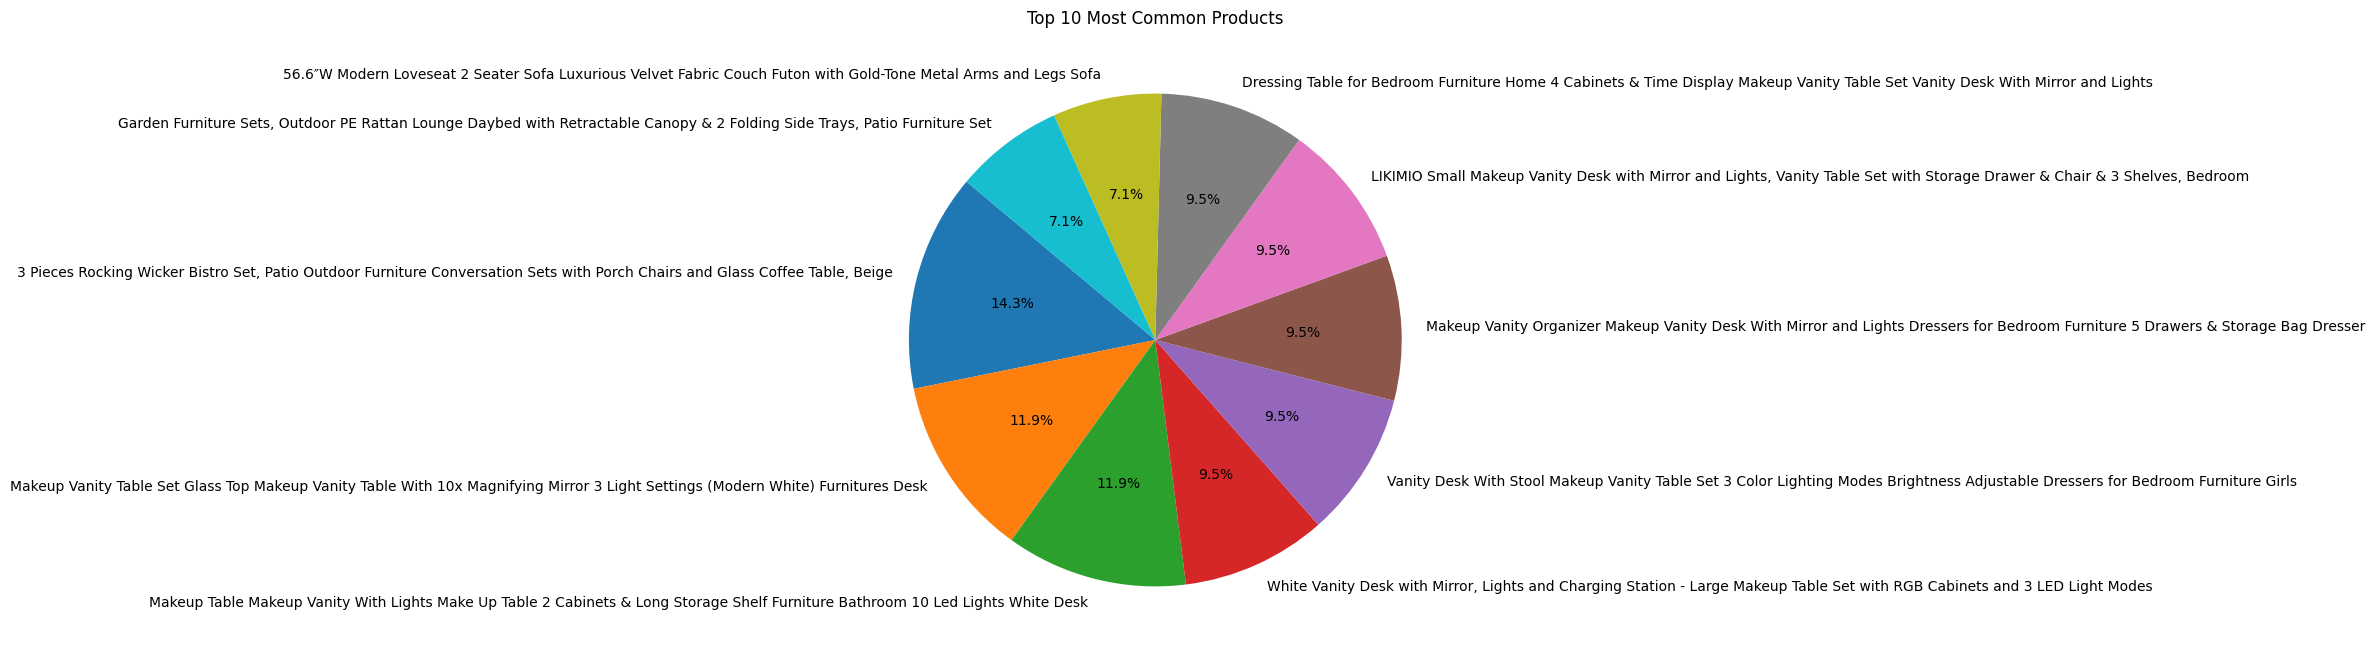

In [ ]:
# 3. Pie chart of the top 10 most common product titles
top_products = df['productTitle'].value_counts().head(10)
plt.figure(figsize=(8, 8))
plt.pie(top_products, labels=top_products.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Most Common Products')
plt.show()

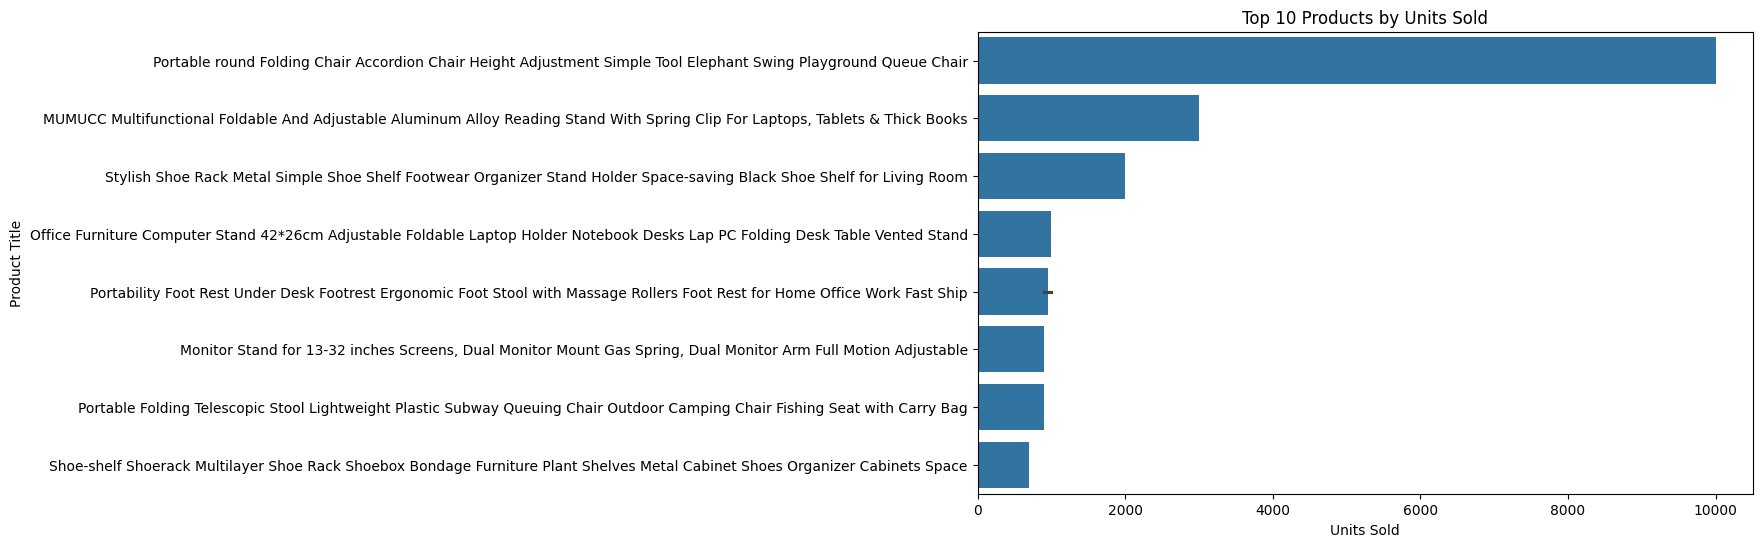

In [ ]:
# 4. Bar chart of sold units
plt.figure(figsize=(10, 6))
sns.barplot(x='sold', y='productTitle', data=df.sort_values('sold', ascending=False).head(10))
plt.title('Top 10 Products by Units Sold')
plt.xlabel('Units Sold')
plt.ylabel('Product Title')
plt.show()

In [ ]:
# 5. Summary of shipping info
print(df['tagText'].value_counts())

tagText
Free shipping         1880
+Shipping: $5.09         9
+Shipping: $239.64       2
+Shipping: $80.21        2
+Shipping: $94.92        2
                      ... 
+Shipping: $134.27       1
+Shipping: $151.69       1
+Shipping: $41.93        1
+Shipping: $78.61        1
+Shipping: $171.49       1
Name: count, Length: 100, dtype: int64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

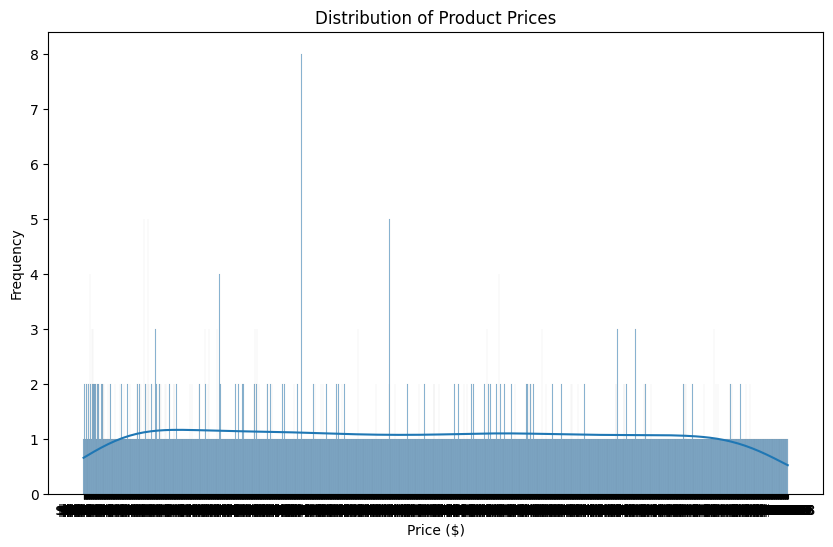

In [ ]:
# Plot the distribution of product prices
plt.figure(figsize=(10,6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of Product Prices')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()

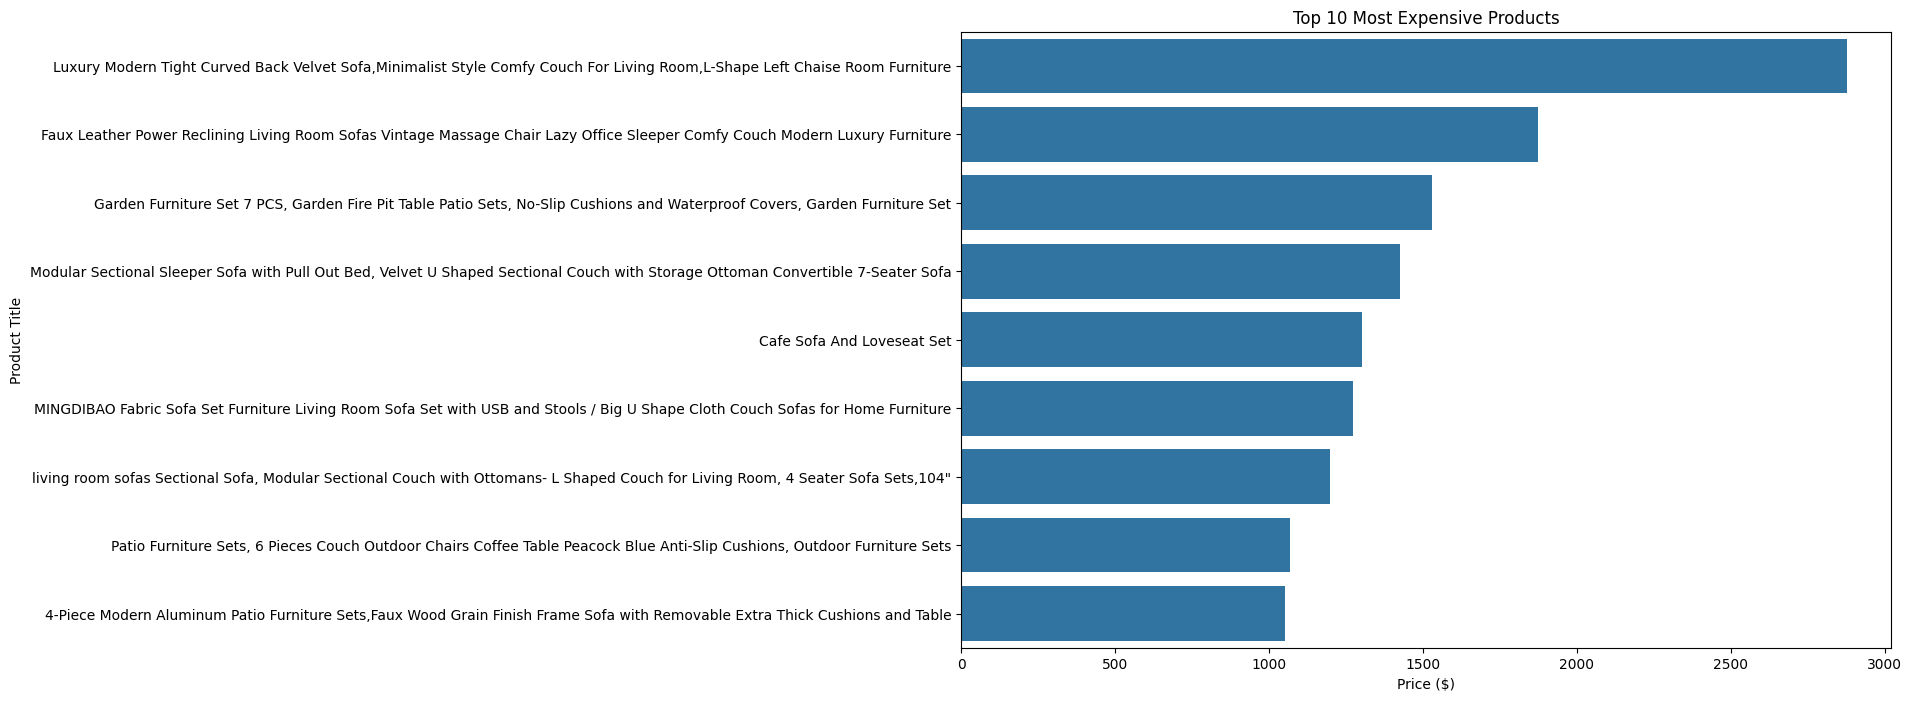

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))

# Remove '$' and ',' then convert to float
df['price_numeric'] = df['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Get top 10 most expensive products
top_expensive = df.nlargest(10, 'price_numeric')

# Plot
sns.barplot(x='price_numeric', y='productTitle', data=top_expensive)
plt.title('Top 10 Most Expensive Products')
plt.xlabel('Price ($)')
plt.ylabel('Product Title')
plt.show()

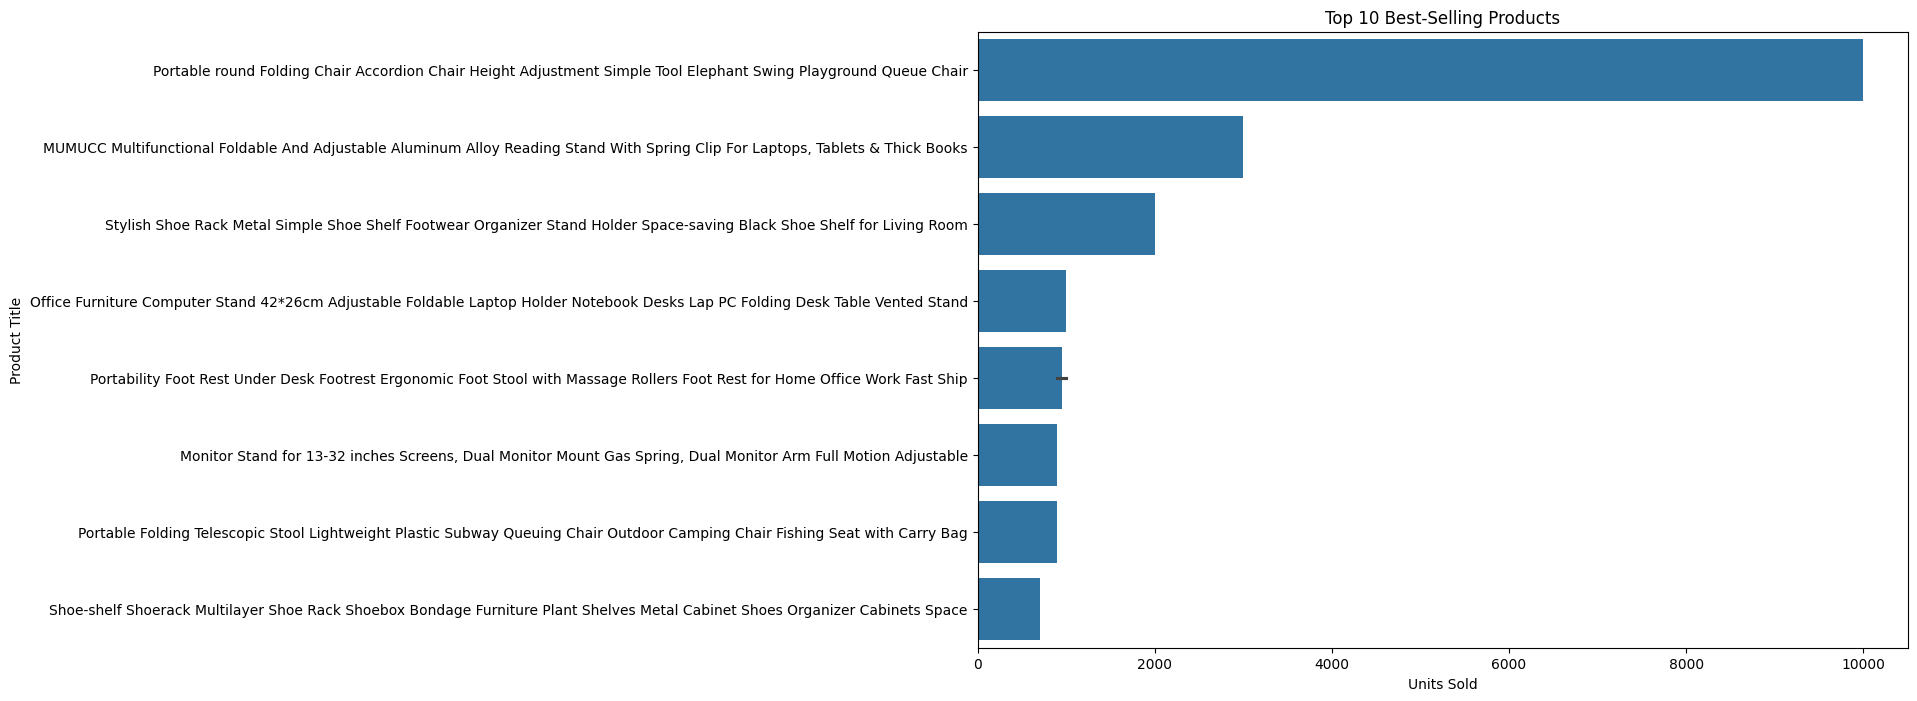

In [ ]:
# Plot the top 10 best-selling products
plt.figure(figsize=(12,8))
top_selling = df.nlargest(10, 'sold')
sns.barplot(x='sold', y='productTitle', data=top_selling)
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Units Sold')
plt.ylabel('Product Title')
plt.show()